Write your own program in Python which works as image quantizer. Take any 8-bit grayscale image as input. Without using any pre-defined function, quantize it into 
a)	64 levels (=L)
b)	32 levels
c)	16 levels
d)	4 levels


From Scratch

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('einstein.jpg')

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
img = rgb2gray(img)
img.shape

(226, 223)

In [ ]:
fmin = np.amin(img)
fmax = np.amax(img)
B = fmax - fmin
print(fmin, fmax)
print(B)

0.0 226.9773
226.9773


In [ ]:
import math
def Q(f, fmin, q):
  return np.floor((f - fmin) / q) * q + q / 2 + fmin

In [ ]:
L = [64, 32, 16, 4]
images = []
images.append(img)
for i in range(len(L)):
  q = B / L[i]
  images.append(Q(img, fmin, q))

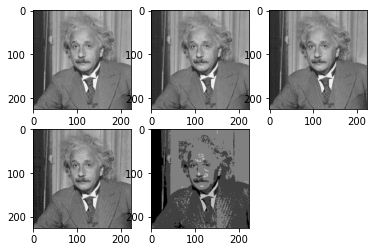

In [ ]:
r, c = 2, 3

for i in range(r * c - 1):
  plt.subplot(r, c, i + 1)
  plt.imshow(images[i], cmap = 'gray')

e) Using PIL 

(223, 226)


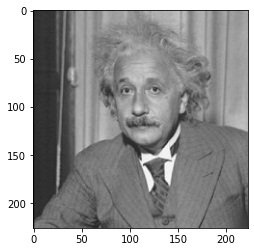

In [ ]:
img = Image.open('einstein.jpg').convert('L')
print(img.size)
img_arr = np.asarray(img)
plt.imshow(img_arr, cmap = 'gray')

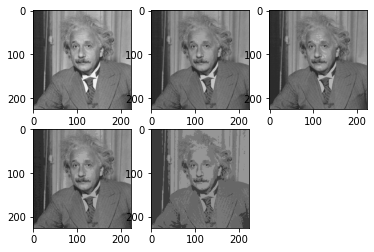

In [ ]:
r, c = 2, 3
L = [64, 32, 16, 4]

images_p = [img]
for i in range(len(L)):
  images_p.append(img.quantize(L[i]))

for i in range(r * c - 1):
  plt.subplot(r, c, i + 1)
  plt.imshow(images_p[i], cmap = 'gray')

f) Mean Squared Error.

In [ ]:
print(type(images[0]))
print(len(images))
print(images[0].shape)

<class 'numpy.ndarray'>
5
(226, 223)


In [ ]:
MSE = []

for i in range(len(L)):
  MSE.append(np.square(np.subtract(images[0], images[i + 1])).mean())
print(MSE)

[1.0506702438483977, 4.254340172851074, 18.03106983654749, 302.8212765090409]


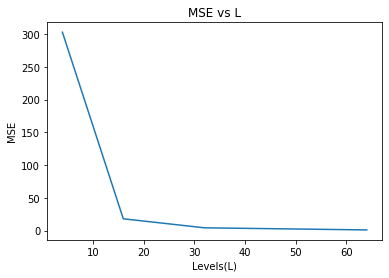

In [ ]:
plt.plot(L, MSE)
plt.xlabel("Levels(L)")
plt.ylabel("MSE")
plt.title("MSE vs L")
plt.show()

we can observe that the MSE increases as the no of levels decreases
Also the clarity of the images goes down as we decrease L

2. Distance Measures

Write a program to compute following distance transforms of the binary image b. First convert grayscale image to binary image. This can be done by setting a threshold such as 0 can be assigned to intensity values <= r and 1 is assigned to intensity values > r where you can choose any value of r from range of intensity values in grayscale image.
a)	Euclidean distance
b)	City- block distance
c)	Chessboard distance


In [ ]:
# img = Image.open('einstein.jpg')
# img = np.asarray(img)
# thresh = 125
# print(img.flags)
# img.setflags(write=1)
# img[img >= thresh] = 1

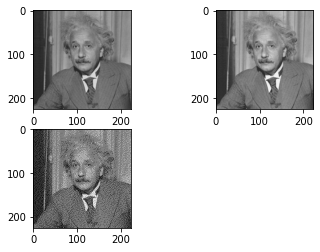

In [ ]:
img = Image.open('einstein.jpg')
img_gray = img.convert('L')
img_bin = img_gray.convert('1')

images = [img, img_gray, img_bin]
for i in range(3):
  plt.subplot(2, 2, i + 1)
  plt.imshow(np.asarray(images[i]), cmap = 'gray')

In [ ]:
print("Binary image")
print(int(np.amin(img_bin)))
print(int(np.amax(img_bin)))

Binary image
0
1


In [ ]:
print(np.array(img_bin))

[[False False False ... False  True False]
 [False False False ...  True False  True]
 [False False False ... False  True  True]
 ...
 [False False  True ... False False  True]
 [False False  True ...  True False False]
 [False False  True ... False False False]]


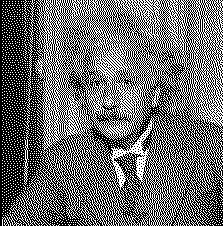

In [ ]:
img_bin

In [ ]:
import cv2 
img = cv2.imread('einstein.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]

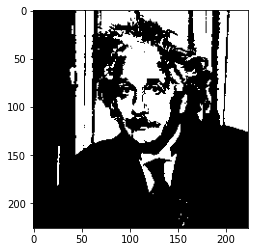

In [ ]:
plt.imshow(bw_img, cmap = 'gray')

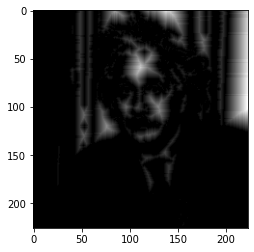

In [ ]:
# euclidean distance
# from sklearn.metrics.pairwise import euclidean_distances
# euclidean_distances(img_bin, img_bin)

dist_euc = cv2.distanceTransform(bw_img, cv2.DIST_L1, 3)
plt.imshow(dist_euc, cmap = 'gray')

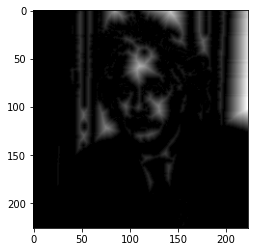

In [ ]:
# city-block distance

# from scipy.spatial import distance
# distance.cdist(img_bin, img_bin)
dist_cb = cv2.distanceTransform(bw_img,cv2.DIST_L2, 3)
plt.imshow(dist_cb, cmap ='gray')

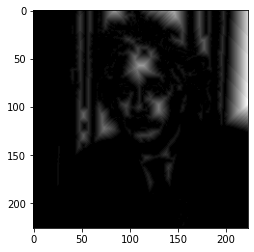

In [ ]:
# chessboard distance
dist_chess = cv2.distanceTransform(bw_img,cv2.DIST_C, 3)
plt.imshow(dist_chess, cmap = 'gray')

3) Spatial Operation:
Write a program to implement spatial domain averaging filter and to observe its blurring effect on the image without using inbuilt functions. Study the effect of applying mean filters of 3x3 5x5, 7x7 on images and compare results


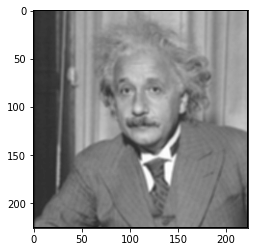

In [ ]:
# filter = 3 x 3
img = cv2.imread('einstein.jpg',0) 
m, n = img.shape 
mask = np.ones([3, 3], dtype = int) 
mask = mask / 9  
img_new = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        img_new[i, j]= temp 
img_new = img_new.astype(np.uint8) 
plt.imshow(img_new, cmap = 'gray')

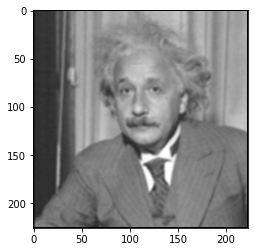

In [ ]:
# filter = 5 x 5
m, n = img.shape 
mask = np.ones([5, 5], dtype = int) 
mask = mask / 25  
img_new = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        img_new[i, j]= temp 
img_new = img_new.astype(np.uint8) 
plt.imshow(img_new, cmap = 'gray')

In [ ]:
# filter = 7 x 7
m, n = img.shape 
mask = np.ones([17, 17], dtype = int) 
mask = mask / 49  
img_new = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2] 
        img_new[i, j]= temp 
img_new = img_new.astype(np.uint8) 
plt.imshow(img_new, cmap = 'gray')